In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

## 1. The definition of loss function

In [2]:
def loss(rx, ry, w):
    m = len(rx)
    sse = 0.
    for j in range(m):
        y = w[0] + w[1] * rx[j]
        sse += (ry[j] - y) ** 2
    return sse[0]

## 2. Assume a linear regression model

In [3]:
from sklearn.datasets import make_regression
rx, ry = make_regression(
    n_samples=100,
    n_features=1,
    noise=1,
    bias=1
)

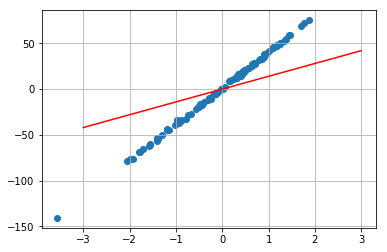

In [4]:
plt.grid()
plt.scatter(rx, ry)
x = np.linspace(-3,3,100)
w=[0,14]
y = w[0] + x * w[1]
plt.plot(x, y, '-r', label=f'y={w[1]}x+{w[0]}')

In [5]:
loss(rx, ry, w)

68205.58058775972

## 3. Plot the error function for w[1]

In [6]:
errors=[]
samples = np.linspace(5,200, 1000)
for n in samples:
    errors.append(loss(rx, ry, [0, n]))
errors=pd.Series(errors)

In [7]:
errors

0      1.247455e+05
1      1.233391e+05
2      1.219406e+05
3      1.205502e+05
4      1.191678e+05
5      1.177933e+05
6      1.164268e+05
7      1.150684e+05
8      1.137179e+05
9      1.123753e+05
10     1.110408e+05
11     1.097143e+05
12     1.083958e+05
13     1.070852e+05
14     1.057826e+05
15     1.044880e+05
16     1.032015e+05
17     1.019228e+05
18     1.006522e+05
19     9.938960e+04
20     9.813495e+04
21     9.688830e+04
22     9.564963e+04
23     9.441895e+04
24     9.319626e+04
25     9.198155e+04
26     9.077483e+04
27     8.957610e+04
28     8.838536e+04
29     8.720260e+04
           ...     
970    2.514405e+06
971    2.520746e+06
972    2.527096e+06
973    2.533453e+06
974    2.539819e+06
975    2.546192e+06
976    2.552574e+06
977    2.558963e+06
978    2.565360e+06
979    2.571766e+06
980    2.578179e+06
981    2.584601e+06
982    2.591030e+06
983    2.597467e+06
984    2.603913e+06
985    2.610366e+06
986    2.616827e+06
987    2.623297e+06
988    2.629774e+06


In [8]:
errors.shape

(1000,)

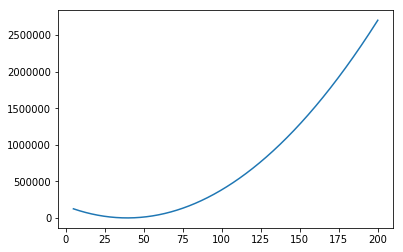

In [9]:
plt.plot(samples, errors)

## 4. Plot the error function for w[0]

In [10]:
errors=[]
samples = np.linspace(-50,50, 1000)
for n in samples:
    errors.append(loss(rx, ry, [n, 75]))
errors=pd.Series(errors)

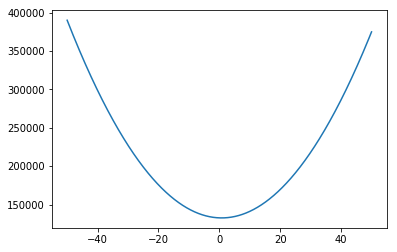

In [11]:
plt.plot(samples, errors)

## 5. Plot the 3D error surface

In [12]:
from mpl_toolkits.mplot3d import Axes3D

In [13]:
w1_samples = np.linspace(5,100, 100)
w0_samples = np.linspace(-50 , 50, 100)

In [14]:
print(errors.shape)

(1000,)


In [15]:
X, Y = np.meshgrid(w0_samples, w1_samples)

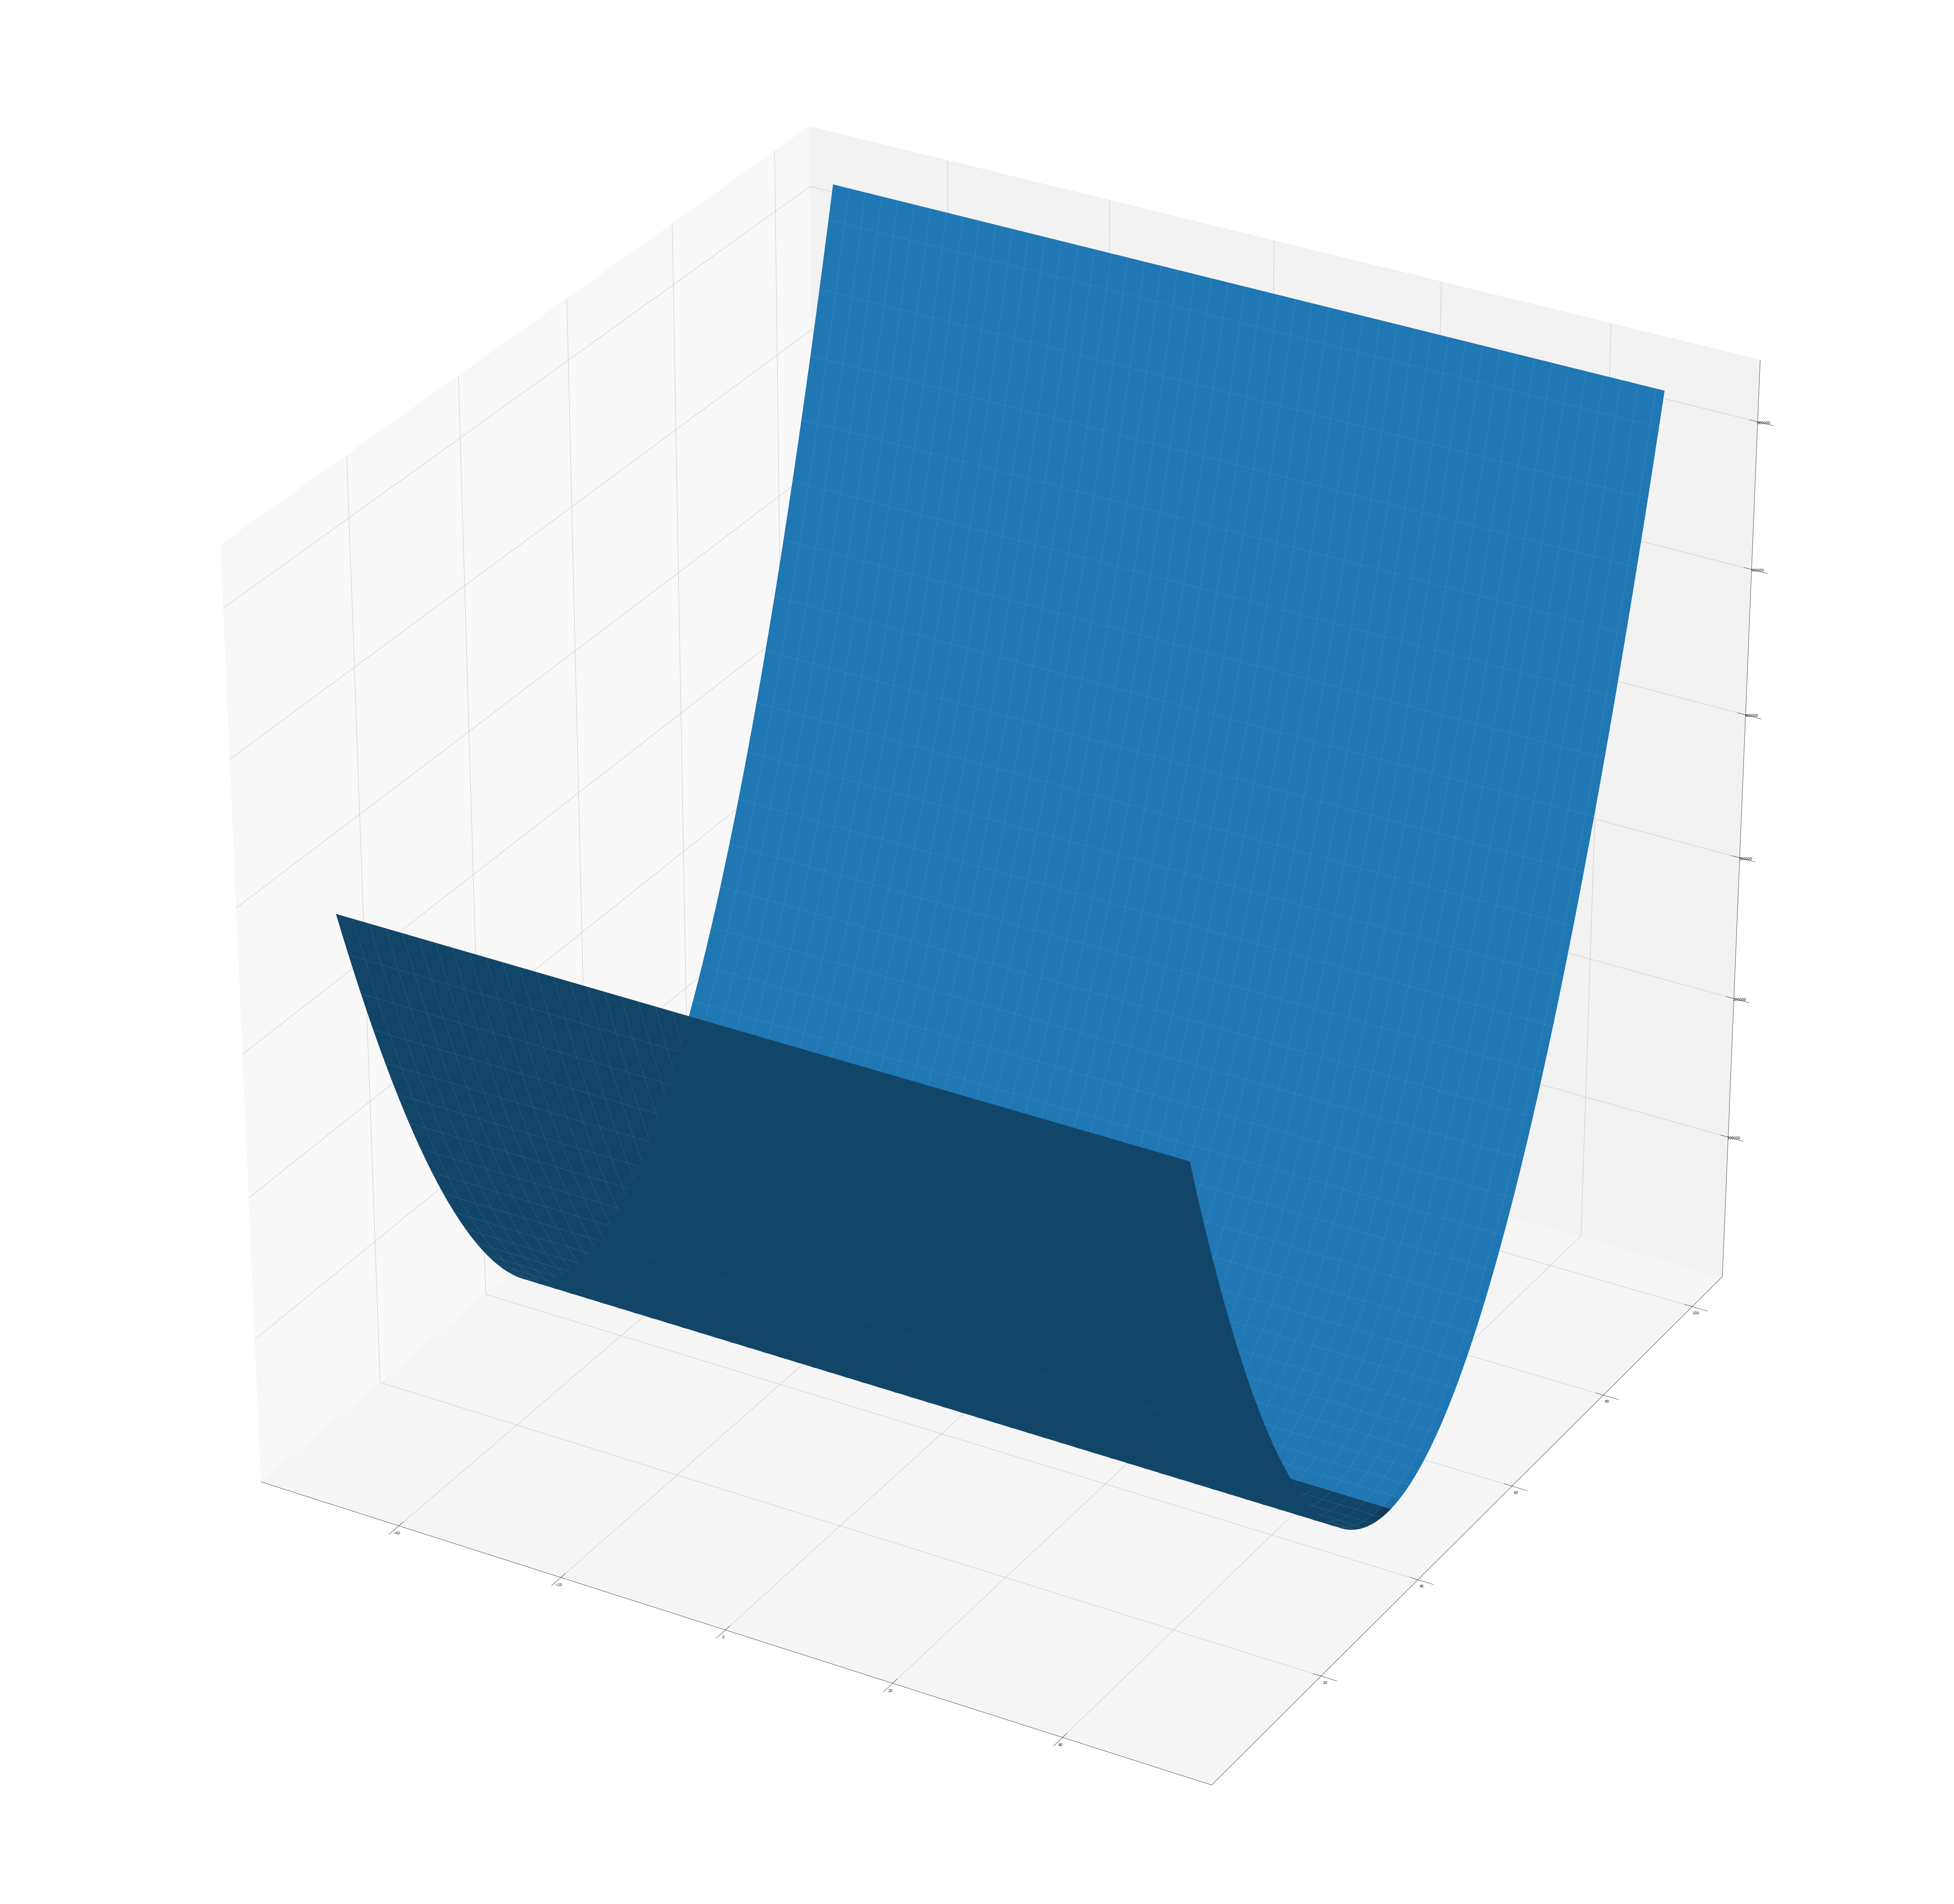

In [16]:
# Compute a 3D parabola
total_errors = []
for i in range(len(w0_samples)):
    errors = []
    errors.append(loss(rx, ry, [w0_samples[i], w1_samples[i]]))
    total_errors.append(errors)

# Open a figure to place the plot on
fig = plt.figure(figsize=(100, 100))
# Initialize 3D plot
ax = fig.gca(projection='3d')
# Plot the surface
ax.plot_surface(X=X,Y=Y,Z=np.array(total_errors))

plt.show()